In [1207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [1208]:
df = pd.read_csv('./data/hcvdat0.csv', index_col=0)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,category,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [1209]:
# according ot the dataset documentation, column 0 is the patient id

In [1210]:
# two categorical values: category (which is the target variable) and sex

In [1211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  615 non-null    object 
 1   age       615 non-null    int64  
 2   sex       615 non-null    object 
 3   alb       614 non-null    float64
 4   alp       597 non-null    float64
 5   alt       614 non-null    float64
 6   ast       615 non-null    float64
 7   bil       615 non-null    float64
 8   che       615 non-null    float64
 9   chol      605 non-null    float64
 10  crea      615 non-null    float64
 11  ggt       615 non-null    float64
 12  prot      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [1212]:
# let's see the outcome distribution in this dataset
df.category.value_counts()

category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [1213]:
df.describe().round()

,age,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
count,615.0,614.0,597.0,614.0,615.0,615.0,615.0,605.0,615.0,615.0,614.0
mean,47.0,42.0,68.0,28.0,35.0,11.0,8.0,5.0,81.0,40.0,72.0
std,10.0,6.0,26.0,25.0,33.0,20.0,2.0,1.0,50.0,55.0,5.0
min,19.0,15.0,11.0,1.0,11.0,1.0,1.0,1.0,8.0,4.0,45.0
25%,39.0,39.0,52.0,16.0,22.0,5.0,7.0,5.0,67.0,16.0,69.0
50%,47.0,42.0,66.0,23.0,26.0,7.0,8.0,5.0,77.0,23.0,72.0
75%,54.0,45.0,80.0,33.0,33.0,11.0,10.0,6.0,88.0,40.0,75.0
max,77.0,82.0,417.0,325.0,324.0,254.0,16.0,10.0,1079.0,651.0,90.0


In [1214]:
# from the describe function, there don't seem to be any "crazy" values (too large, too small). i.e., outliers

In [1215]:
# Show number of unique values
df.nunique()


category      5
age          49
sex           2
alb         189
alp         414
alt         341
ast         297
bil         188
che         407
chol        313
crea        117
ggt         358
prot        198
dtype: int64

In [1216]:
# find null values
df.isnull().sum()

category     0
age          0
sex          0
alb          1
alp         18
alt          1
ast          0
bil          0
che          0
chol        10
crea         0
ggt          0
prot         1
dtype: int64

In [1217]:
# we will fill these null values with the average value. Placing a zero value makes no sense 
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,category,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
1,0=Blood Donor,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [1218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  615 non-null    object 
 1   age       615 non-null    int64  
 2   sex       615 non-null    object 
 3   alb       615 non-null    float64
 4   alp       615 non-null    float64
 5   alt       615 non-null    float64
 6   ast       615 non-null    float64
 7   bil       615 non-null    float64
 8   che       615 non-null    float64
 9   chol      615 non-null    float64
 10  crea      615 non-null    float64
 11  ggt       615 non-null    float64
 12  prot      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


<h1>EDA and Data preprocessing</h1>

category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

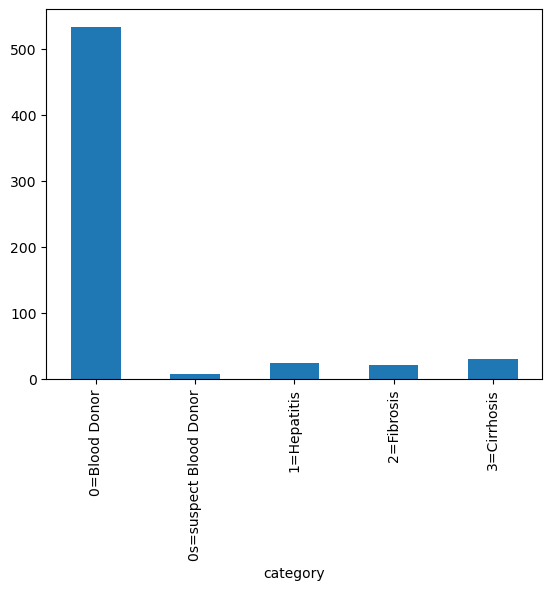

In [1219]:
# let's do some EDA.
# From the data, let's see how many  men vs women have cirrhosis and how many have fibrosis

df.category.value_counts(sort=False).plot.bar()
df.category.value_counts()

In [1220]:
# show all categories and place them in dictionary
categs=df.category.unique()
categs

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [1221]:
# let's create a dictionary to hold the male/female values. Also, replace all of the existing values with a numerical value
sex_definition=df.sex.unique()
sex_category={}

for c in sex_definition:
    if c=="m":
        sex_category[c]=0
    else:
        sex_category[c]=1
    df.replace(c, sex_category[c], inplace=True)


In [1222]:
# let's create a dictionary to hold these values. Also, replace all of the existing values with a numerical 
patient_category={}

for c in categs:
    if c.split("=")[0]=="0s":
        patient_category[4]=c.split("=")[1]
        df.replace(c, 4, inplace=True)
    else:
        patient_category[int(c.split("=")[0])]=c.split("=")[1]
        df.replace(c, c.split("=")[0], inplace=True)
    
patient_category


{0: 'Blood Donor',
 4: 'suspect Blood Donor',
 1: 'Hepatitis',
 2: 'Fibrosis',
 3: 'Cirrhosis'}

In [1223]:
df

,category,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
1,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Text(0.5, 1.0, 'Correlation Matrix')

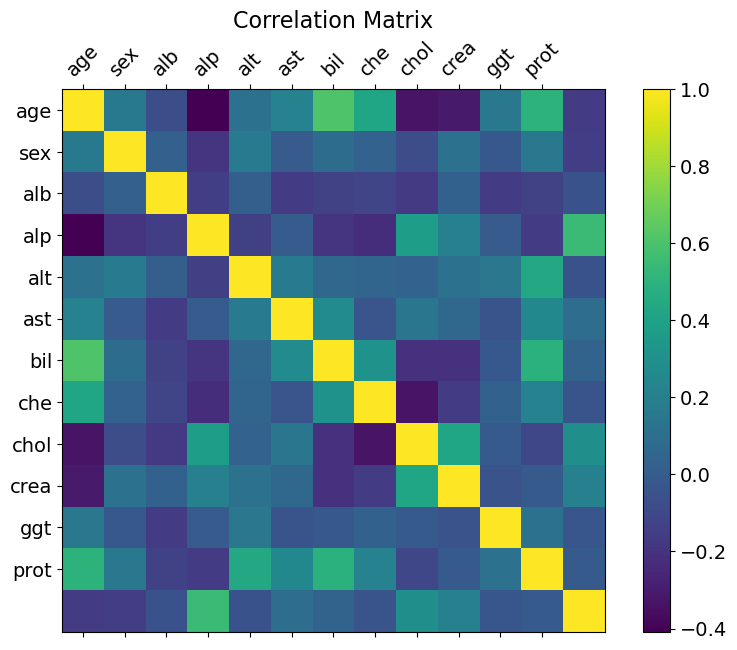

In [1224]:
# now let's look at a correlation matrix, see https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
f = plt.figure(figsize=(10, 7))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)



In [1225]:
# A different version of the correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,category,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
category,1.00,0.16,-0.07,-0.41,0.12,0.22,0.61,0.42,-0.34,-0.31,0.16,0.50,-0.16
age,0.16,1.00,0.02,-0.20,0.17,-0.01,0.09,0.03,-0.08,0.12,-0.02,0.15,-0.15
sex,-0.07,0.02,1.00,-0.15,0.02,-0.16,-0.13,-0.11,-0.17,0.03,-0.16,-0.13,-0.05
alb,-0.41,-0.20,-0.15,1.00,-0.14,0.00,-0.19,-0.22,0.38,0.20,-0.00,-0.16,0.55
alp,0.12,0.17,0.02,-0.14,1.00,0.17,0.06,0.05,0.03,0.12,0.15,0.44,-0.05
alt,0.22,-0.01,-0.16,0.00,0.17,1.00,0.27,-0.04,0.15,0.07,-0.04,0.25,0.09
ast,0.61,0.09,-0.13,-0.19,0.06,0.27,1.00,0.31,-0.21,-0.21,-0.02,0.49,0.04
bil,0.42,0.03,-0.11,-0.22,0.05,-0.04,0.31,1.00,-0.33,-0.16,0.03,0.22,-0.04
che,-0.34,-0.08,-0.17,0.38,0.03,0.15,-0.21,-0.33,1.00,0.42,-0.01,-0.11,0.29
chol,-0.31,0.12,0.03,0.20,0.12,0.07,-0.21,-0.16,0.42,1.00,-0.05,-0.01,0.21


<h1>Create ML models</h1>

In [1226]:
from sklearn.model_selection import train_test_split


In [1227]:
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
# reset indexes and delete target variable ("category") from original dataset

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# create target variable 
y_full_train = df_full_train.category.astype('int').values
y_train = df_train.category.astype('int').values   # astype('int') is for xgboost matrix
y_val = df_val.category.astype('int').values
y_test = df_test.category.astype('int').values

# delete the target variable from the datasets
del df_full_train['category']
del df_train['category']
del df_val['category']
del df_test['category']


df_train

,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
0,45,0,41.7,73.2,43.6,29.4,6.4,8.89,5.31,71.0,67.4,70.3
1,54,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
2,46,0,49.1,60.0,19.5,20.5,3.1,7.81,5.02,102.0,20.8,70.2
3,37,0,43.6,72.8,51.4,43.7,13.8,8.16,4.88,70.0,94.5,75.2
4,53,0,40.5,76.1,27.8,22.0,6.3,11.14,6.96,90.0,53.1,71.3
...,...,...,...,...,...,...,...,...,...,...,...,...
364,51,1,43.7,61.3,18.0,23.3,4.3,9.57,6.04,70.0,18.6,75.2
365,48,1,44.4,64.5,17.2,21.1,17.3,4.93,4.05,67.0,12.1,71.2
366,35,0,44.7,79.3,53.5,30.8,9.7,11.39,7.04,88.0,77.3,77.1
367,39,0,45.1,63.9,26.0,21.3,9.3,8.57,5.24,79.0,29.4,71.2


In [1228]:
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import accuracy_score


In [1229]:
#Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [1230]:
import xgboost as xgb


In [1231]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names_out())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [1232]:
xgb_params = {
    'eta': 0.4, 
    'max_depth': 3,
    'min_child_weight': 5,
    
    'objective': 'multi:softmax',   # this is a multiclass regression problem so we use multi:softmax instead of binary:logistic we saw in the course
    'num_class': 5,    # we are dealing with 5 possible classes as outcome
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=150)

In [1233]:
y_pred = model.predict(dtest)  # must predict probabilities for a multiclass problem

In [1234]:
# evaluate predictions. Got this from here: https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/
# try other suggestions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.06%
